# imp libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# data cleaning

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
df = df.drop(columns='Cabin',axis=1)

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 0 to 415
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Survived     331 non-null    int64  
 2   Pclass       331 non-null    int64  
 3   Name         331 non-null    object 
 4   Sex          331 non-null    object 
 5   Age          331 non-null    float64
 6   SibSp        331 non-null    int64  
 7   Parch        331 non-null    int64  
 8   Ticket       331 non-null    object 
 9   Fare         331 non-null    float64
 10  Embarked     331 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 31.0+ KB


In [8]:
# drop irelated columns
df = df.drop(['PassengerId','Name','Ticket','Fare'],axis = 1)

In [9]:
# convert age column type float to int
df['Age']=df['Age'].round().astype(int)



In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 0 to 415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  331 non-null    int64 
 1   Pclass    331 non-null    int64 
 2   Sex       331 non-null    object
 3   Age       331 non-null    int32 
 4   SibSp     331 non-null    int64 
 5   Parch     331 non-null    int64 
 6   Embarked  331 non-null    object
dtypes: int32(1), int64(4), object(2)
memory usage: 19.4+ KB


# data analysis

In [11]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,331.000000,331.000000,331.000000,331.000000,331.000000
mean,0.383686,2.141994,30.163142,0.483384,0.398792
std,0.487019,0.846251,14.106219,0.875004,0.811582
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000
50%,0.000000,2.000000,27.000000,0.000000,0.000000
75%,1.000000,3.000000,39.000000,1.000000,1.000000
max,1.000000,3.000000,76.000000,8.000000,6.000000


In [12]:
Gender_count = df['Sex'].value_counts()
Gender_count

Sex
male      204
female    127
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender count')

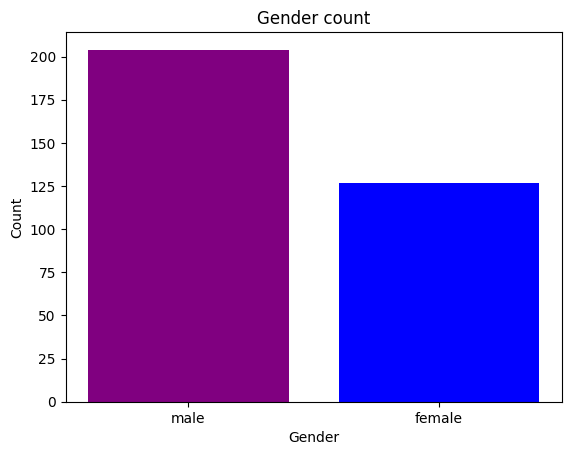

In [13]:
x = df['Sex'].value_counts().keys()
y = df['Sex'].value_counts()

Gender = plt.bar(x,y,color=['purple','blue'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender count")

([<matplotlib.axis.XTick at 0x1f522035890>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

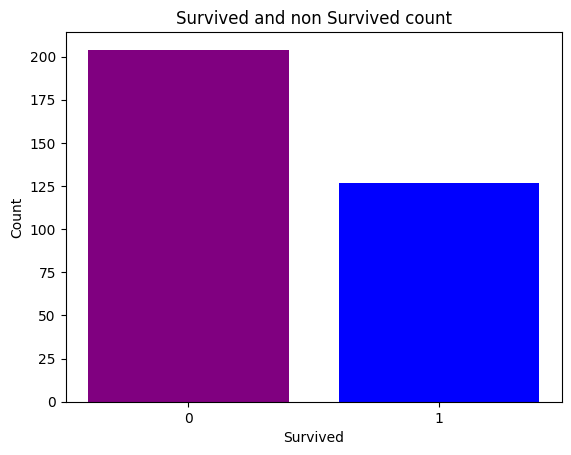

In [14]:
x = df['Survived'].value_counts().keys()
y = df['Survived'].value_counts()

Survived =  plt.bar(x,y,color=['purple','blue'])
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survived and non Survived count")
plt.xticks(df['Survived'].unique())

Text(0.5, 1.0, 'different Embarked count')

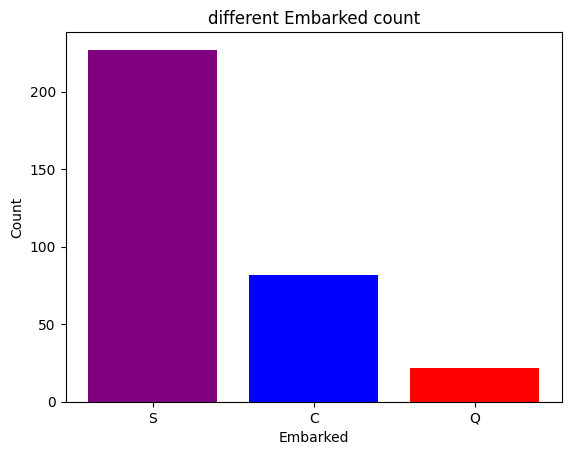

In [15]:
# no of peoples in differant Embark

x = df['Embarked'].value_counts().keys()
y = df['Embarked'].value_counts()

Embarked =  plt.bar(x,y,color=['purple','blue','red'])
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.title("different Embarked count")


Text(0.5, 1.0, 'different class count')

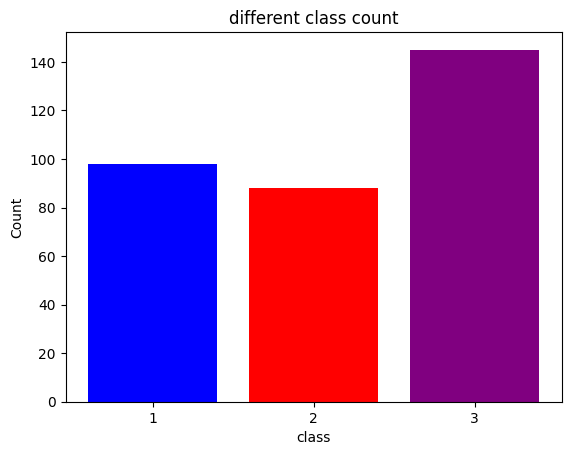

In [16]:
# different class 

x = df['Pclass'].value_counts().keys()
y = df['Pclass'].value_counts()

pclass =  plt.bar(x,y,color=['purple','blue','red'])
plt.xlabel("class")
plt.ylabel("Count")
plt.xticks(df['Pclass'].unique())
plt.title("different class count")



'Number of Passengers in different class of both Male and Female'

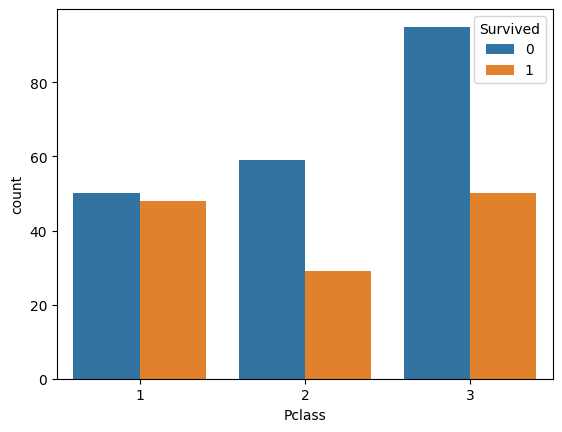

In [17]:
sn.countplot(x = 'Pclass', hue = 'Survived', data = df).set_title
('Number of Passengers in different class of both Male and Female')

# data preprocessing

In [18]:
# label encoder on sex column
mapping = {'male':1,'female':0}
df['Sex']=df['Sex'].map(mapping)

In [19]:
mapping = {'Q':1,'S':2,'C':3}
df['Embarked'] = df['Embarked'].map(mapping)

In [20]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,34,0,0,1
1,1,3,0,47,1,0,2
2,0,2,1,62,0,0,1
3,0,3,1,27,0,0,2
4,1,3,0,22,1,1,2
5,0,3,1,14,0,0,2
6,1,3,0,30,0,0,1
7,0,2,1,26,1,1,2
8,1,3,0,18,0,0,3
9,0,3,1,21,2,0,2


In [21]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Embarked']]
Y = df['Survived']

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

In [39]:
X_sc

array([[ 1.01542612,  0.78901776,  0.27240942, -0.55327231, -0.49211953,
        -2.22706175],
       [ 1.01542612, -1.2673986 ,  1.19538401,  0.59130978, -0.49211953,
        -0.34174861],
       [-0.16804587,  0.78901776,  2.26035469, -0.55327231, -0.49211953,
        -2.22706175],
       ...,
       [ 1.01542612, -1.2673986 , -0.15357885, -0.55327231, -0.49211953,
        -0.34174861],
       [-1.35151786, -1.2673986 ,  0.62739965, -0.55327231, -0.49211953,
         1.54356454],
       [ 1.01542612,  0.78901776,  0.5564016 , -0.55327231, -0.49211953,
        -0.34174861]])

In [40]:
X_sc.shape

(331, 6)

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X_sc,Y,test_size=0.2,random_state=0)

In [42]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(264, 6) (264,) (67, 6) (67,)


In [43]:
model = LogisticRegression()
model.fit(X_train,Y_train).score(X_test,Y_test)

1.0

In [44]:
yhat = model.predict(X_test)

In [45]:
accuracyscore = accuracy_score(Y_test,yhat)
print("accuracy score ::", accuracyscore)

accuracy score :: 1.0


In [46]:
confusion_matrix(Y_test,yhat)

array([[39,  0],
       [ 0, 28]], dtype=int64)

In [47]:
print(classification_report(Y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        28

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
scores = cross_val_score(model,X,Y,cv=30,scoring='accuracy')
print(scores)
print(scores.mean())
# these result is without standaerdised age column

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
1.0


# KNN Result

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
len(X_train)**0.5

16.24807680927192

In [53]:
finalmodel = KNeighborsClassifier(n_neighbors=16)
finalmodel.fit(X_train, Y_train).score(X_test, Y_test)

0.9701492537313433

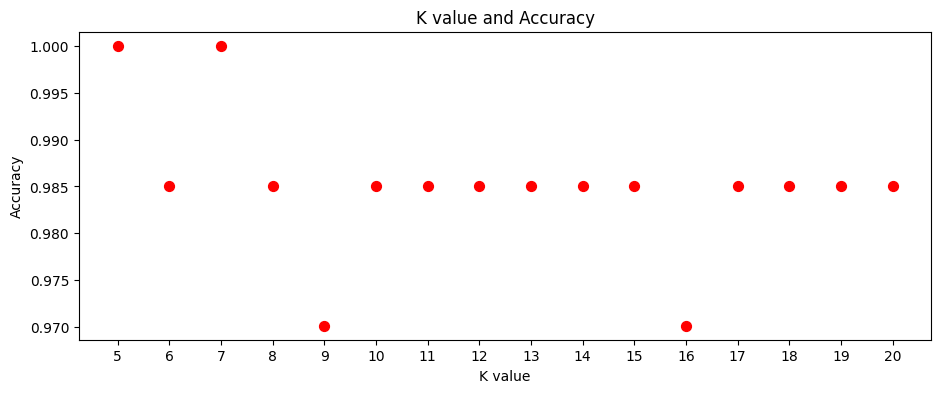

In [54]:
accuracy = []
k = range(5,21)
for i in k:
    #print("No of neighbours:", i)
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, Y_train)
    accuracy.append(model.score(X_test, Y_test))
plt.figure(figsize=(11,4))
plt.scatter(k, accuracy, s= 50, color='r')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.xticks(k)
plt.title("K value and Accuracy")
plt.show()